<a href="https://colab.research.google.com/github/Thanhnhat1211/Bai-Tap-AI/blob/main/Pre_Trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.3 MB/s eta 0:00:00


8/8 [==============================] - 0s 14ms/step
{'box': [1079, 344, 78, 97], 'confidence': 0.9999974966049194, 'keypoints': {'left_eye': (1107, 380), 'right_eye': (1143, 384), 'nose': (1128, 396), 'mouth_left': (1107, 418), 'mouth_right': (1137, 421)}}
{'box': [45, 138, 78, 96], 'confidence': 0.9999912977218628, 'keypoints': {'left_eye': (75, 168), 'right_eye': (108, 171), 'nose': (94, 186), 'mouth_left': (75, 198), 'mouth_right': (104, 202)}}
{'box': [464, 218, 69, 87], 'confidence': 0.9999737739562988, 'keypoints': {'left_eye': (485, 252), 'right_eye': (520, 251), 'nose': (506, 271), 'mouth_left': (491, 289), 'mouth_right': (516, 290)}}
{'box': [283, 409, 99, 107], 'confidence': 0.9999110698699951, 'keypoints': {'left_eye': (313, 457), 'right_eye': (349, 449), 'nose': (331, 479), 'mouth_left': (322, 492), 'mouth_right': (352, 486)}}
{'box': [352, 194, 80, 90], 'confidence': 0.9998981952667236, 'keypoints': {'left_eye': (379, 227), 'right_eye': (414, 224), 'nose': (400, 245), 'mou

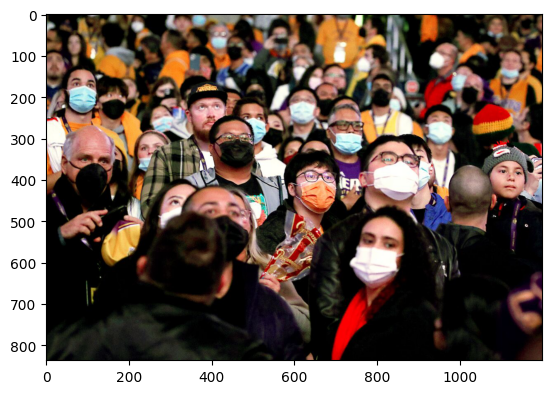

In [3]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN 
filename='/content/tải xuống.jpg'
img=plt.imread(filename)
plt.imshow(img)
detector=MTCNN()
faces=detector.detect_faces(img)
for face in faces:
        print(face)

8/8 [==============================] - 1s 6ms/step


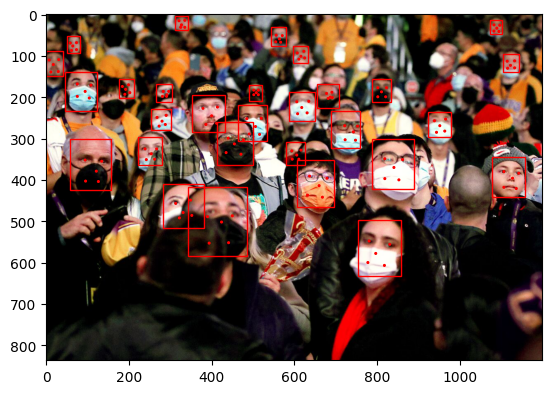

In [12]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN 
filename='/content/tải xuống.jpg'
detector=MTCNN()
faces=detector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
        x,y,width,height=face['box']
        rect=plt.Rectangle((x,y),width,height,fill=False,color='red')
        ax.add_patch(rect)
        for key,value in face['keypoints'].items():
            dot=plt.Circle(value,radius=2,color='red')
            ax.add_patch(dot)
        plt.savefig('Khautrang.jpg')
plt.show()


In [11]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
    data=plt.imread(filename)
    for i in range(len(result_list)):
           x1,y1,width,height=result_list[i]['box']
           x2,y2=x1+width,y1+height
           plt.subplot(1,len(result_list),i+1)
           plt.aixs('off')
           plt.imshow(data[y1:y2,x1:x2])
    plt.show()
    filename='/content/tải xuống.jpg'
    img=plt.imread(filename)
    detector=MTCNN()
    faces=detector.detect_faces(img)
    draw_faces(filename,faces)

1/1 [==============================] - 1s 826ms/step
Predicted: [('n01667778', 'terrapin', 0.3561926), ('n01667114', 'mud_turtle', 0.169908), ('n02504013', 'Indian_elephant', 0.154175)]


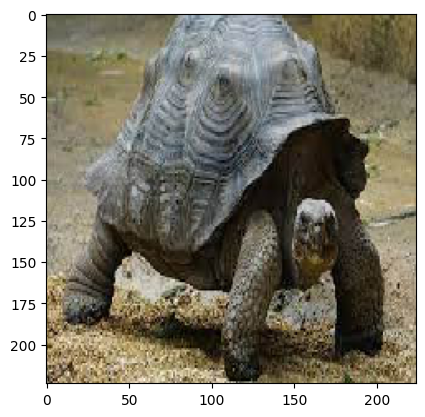

In [27]:

def ResNet50(
    include_top=True,
    weights="/content/su-tu.jpg",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    **kwargs,
):
    """Instantiates the ResNet50 architecture."""

    def stack_fn(x):
        x = stack1(x, 64, 3, stride1=1, name="conv2")
        x = stack1(x, 128, 4, name="conv3")
        x = stack1(x, 256, 6, name="conv4")
        return stack1(x, 512, 3, name="conv5")

    return ResNet(
        stack_fn,
        False,
        True,
        "resnet50",
        include_top,
        weights,
        input_tensor,
        input_shape,
        pooling,
        classes,
        **kwargs,
    )
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/rua.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(img)


1/1 [==============================] - 0s 117ms/step


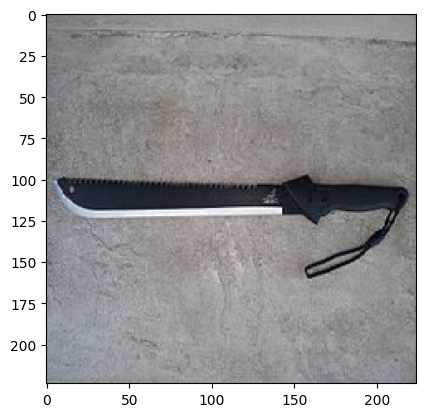

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/300px-Gerber_Machete.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
plt.imshow(img)

1/1 [==============================] - 0s 162ms/step


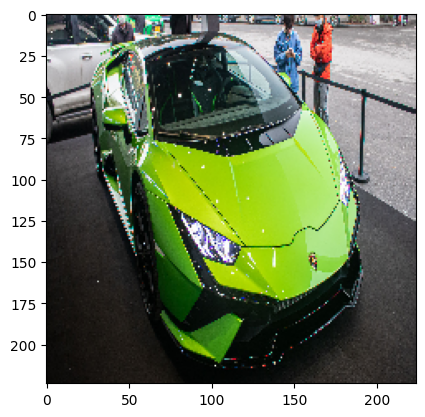

In [32]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/xehoi.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
plt.imshow(img)

In [34]:
pip install youtube-search


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from youtube_search import YoutubeSearch
import webbrowser
from openpyxl import Workbook
data=Workbook()
sheet=data.active
mysong=input('Xin moi chon ten bai hat: ')
print(mysong)
result=YoutubeSearch(mysong,max_results=10).to_dict()
print(result)
for i in range (10):
      print(result[i]['title']) 
      print(result[i]['url_suffix'])
      url='http://www.youtube.com'+result[0]['url_suffix']
      print(url)
      sheet ['A' +str(i+1)]=i+1
      sheet ['B' +str(i+1)]=result[i]['title']
      sheet ['C' +str(i+1)]=result[i]['url_suffix']
      sheet ['D' +str(i+1)]=result[i]['views']
      sheet ['E' +str(i+1)]=result[i]['channel']
      sheet ['F' +str(i+1)]=result[i]['duration']
      sheet ['G' +str(i+1)]=result[i]['publish_time']
      #webbrowser.open(url)
data.save('UTE.xlsx')

Xin moi chon ten bai hat: waiting for you
waiting for you
[{'id': 'CHw1b_1LVBA', 'thumbnails': ['https://i.ytimg.com/vi/CHw1b_1LVBA/hq720.jpg?sqp=-oaymwE9COgCEMoBSFryq4qpAy8IARUAAAAAGAElAADIQj0AgKJDeAHwAQH4Af4JgALQBYoCDAgAEAEYfyAnKB8wDw==&rs=AOn4CLBAgf8AkqKD-M4k2uCHrS1Gt8_J_w', 'https://i.ytimg.com/vi/CHw1b_1LVBA/hq720.jpg?sqp=-oaymwExCNAFEJQDSFryq4qpAyMIARUAAIhCGAHwAQH4Af4JgALQBYoCDAgAEAEYfyAnKB8wDw==&rs=AOn4CLANNgCO6OYXecv90FCuRknNbPGzcw'], 'title': 'MONO - Waiting For You (Album 22 - Track No.10)', 'long_desc': None, 'channel': 'Mono Official', 'duration': '4:26', 'views': '86,297,437 views', 'publish_time': '8 months ago', 'url_suffix': '/watch?v=CHw1b_1LVBA&pp=ygUPd2FpdGluZyBmb3IgeW91'}, {'id': 'm_uWS6K-VF8', 'thumbnails': ['https://i.ytimg.com/vi/m_uWS6K-VF8/hqdefault.jpg?sqp=-oaymwE9COADEI4CSFryq4qpAy8IARUAAAAAGAElAADIQj0AgKJDeAHwAQH4Af4EgALgA4oCDAgAEAEYZSBlKGUwDw==&rs=AOn4CLCGus32Xh1538FSGbTaHM0PwhVZrQ'], 'title': 'I will be right here waiting for you - Richard Marx with lyrics